# Bank marketing dataset
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.
The classification goal is to predict if the client will subscribe a term deposit. The actual
dataset comprises of 4 sets:
There are four datasets:
1. bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
2. bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
3. bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
4. bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

Nb
1. Avoid using the attribute in your model building -  duration: last contact duration.
2. use four different Machine Learning Algorithms (K-NN, SVM, Neural Networks, and Decision Tree) to classify the dataset.
3. Use 10 fold cross-validation for your evaluation.

Link to the data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## The task

### 1. Undertake some brief exploration about direct marketing campaigns. 
What 4 things did you find?
1. Companies use direct marketing when targeting segments of customers by contacting them to meet a specific goal.
2. It is difficult to financially quantify costs, since long term deposits have different amounts, interest rates and subscription periods.
3. It is difficult to estimate intrusiveness of an outbound call (e.g., due to a stressful conversation)
4. When considering the Euribor rate, a lower Euribor would result in a decline in savings rate since most European banks align
their deposits interest rate offers with ECB indexes, particularly with the three month Euribor

### 2. Analyze the data closely.
What do you see?
Characterize the data using your analysis

1. The data contradicts what is expected with a lower Euribor corresponding to a higher probability for deposits subscription, and the same probability decreasing along with the increase of the three month Euribor. 
2. More time already spent on past calls within the same campaign increases probability of success. Similarly, the extracted DT
confirms a positive effect of the duration of previous calls. For instance, when the duration is higher or equal than 13 minutes, then the associated global probability of success is 0.3, while the value decreases to 0.05 (25 people difference) if this duration condition is false.

#### 2.1 getting the dataset ready

In [1]:
# create the dataframes
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from scipy.io import arff

#rurn off warnings
import warnings
warnings.filterwarnings("ignore")

# create header for dataset
header = ['age','job','marital','education','default','housing','loan','contact',
    'month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate',
    'cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y']


df_full = pd.read_csv("data/bank-additional-full.arff",
        header=None,
        names=header
      )
df_small = pd.read_csv("data/bank-additional.arff",
        header=None,
        names=header
      )
bank_marketing_full=df_full
bank_marketing_small=df_small
#visualize the full dataset
df_full.head()



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,@relation bank-additional-full,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@attribute age numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@attribute job {housemaid,services,admin.,blue-collar,technician,retired,management,unemployed,self-employed,unknown,...,student},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@attribute marital {married,single,divorced,unknown},NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@attribute education {basic.4y,high.school,basic.6y,basic.9y,professional.course,unknown,university.degree,illiterate},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#visualize the smaller dataset
df_small.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,@relation bank-additional,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,@attribute age numeric,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,@attribute job {blue-collar,services,admin.,entrepreneur,self-employed,technician,management,student,retired,housemaid,...,unknown},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@attribute marital {married,single,divorced,unknown},NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,@attribute education {basic.9y,high.school,university.degree,professional.course,basic.6y,basic.4y,unknown,illiterate},NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Are there any missing characters?
What do you do about them

### 3.1 Check for missing values
There are some missing values. We could take several approaches to missing values:
1. Fill them with some value(imputation)
2. Removing the samples with missing values altogether

In [3]:
#Check for missing values in the full dataset
df_full.isna().sum()

age                0
job               12
marital           14
education         18
default           19
housing           20
loan              20
contact           20
month             21
day_of_week       21
duration          22
campaign          22
pdays             23
previous          23
poutcome          23
emp.var.rate      23
cons.price.idx    23
cons.conf.idx     23
euribor3m         23
nr.employed       23
y                 23
dtype: int64

In [4]:
#Check for missing values in the small dataset
df_small.isna().sum()

age                0
job               12
marital           14
education         18
default           19
housing           20
loan              20
contact           20
month             21
day_of_week       21
duration          22
campaign          22
pdays             23
previous          23
poutcome          23
emp.var.rate      23
cons.price.idx    23
cons.conf.idx     23
euribor3m         23
nr.employed       23
y                 23
dtype: int64

There are missing values. We are going to drop attributes with missing values

In [5]:
# drop the NaN
df_full = df_full.dropna(axis=0, how="any")
df_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
23,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
24,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
25,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
27,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# drop the NaN
df_small = df_small.dropna(axis=0, how="any")
df_small.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
23,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
24,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
25,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
26,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
27,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [7]:
#confirm all missing values have been removed
df_full.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
#confirm all missing values have been removed
df_small.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
# print total samples
print("Total samples:", len(df_full))

Total samples: 41188


In [10]:
# print total samples
print("Total samples:", len(df_small))

Total samples: 4119


In [11]:
# drop the duration column
df_full = df_full.drop(labels=['duration'], axis=1)
df_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
23,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
24,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
25,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
26,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
27,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [12]:
# drop the duration column
df_small = df_small.drop(labels=['duration'], axis=1)
df_small.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
23,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999.0,0.0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
24,39,services,single,high.school,no,no,no,telephone,may,fri,4,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
25,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
26,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999.0,0.0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
27,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999.0,0.0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


### 4. Work with the entire larger dataset and classify the data. 
Take note of the accuracy, RMS error and the ROC Area. In addition, take note of the time.

In [13]:
# Create X(data/feature variables)
X = df_full.drop("y", axis=1)
global_X=X
X.describe()

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Convert categorical features into numeric features

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['job','marital','education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome'
        ]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0,0,0,1,0,0,0,0,0,0,...,0,56,1,999,0,1.1,93.994,-36.4,4.857,5191
1,0,0,0,0,0,0,0,1,0,0,...,0,57,1,999,0,1.1,93.994,-36.4,4.857,5191
2,0,0,0,0,0,0,0,1,0,0,...,0,37,1,999,0,1.1,93.994,-36.4,4.857,5191
3,1,0,0,0,0,0,0,0,0,0,...,0,40,1,999,0,1.1,93.994,-36.4,4.857,5191
4,0,0,0,0,0,0,0,1,0,0,...,0,56,1,999,0,1.1,93.994,-36.4,4.857,5191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0,0,0,0,0,1,0,0,0,0,...,0,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,0,1,0,0,0,0,0,0,0,0,...,0,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,0,0,0,0,0,1,0,0,0,0,...,0,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,0,0,0,0,0,0,0,0,0,1,...,0,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [15]:
# Create Y(labels)
y = df_full["y"]
global_y=y
y.describe()

count     41188
unique        2
top          no
freq      36548
Name: y, dtype: object

## split the training and test data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3, shuffle=True)
print("X_Training data\n", X_train)
print("X_Test data\n", X_test)
print("y_Training data\n", y_train)
print("y_Test data\n",  y_test)

X_Training data
 [[0.0 0.0 0.0 ... -38.3 0.904 4991.6]
 [0.0 1.0 0.0 ... -46.2 1.334 5099.1]
 [0.0 0.0 0.0 ... -42.7 4.962 5228.1]
 ...
 [0.0 0.0 0.0 ... -36.1 4.9639999999999995 5228.1]
 [0.0 0.0 0.0 ... -47.1 1.365 5099.1]
 [1.0 0.0 0.0 ... -36.4 4.857 5191.0]]
X_Test data
 [[0.0 1.0 0.0 ... -46.2 1.354 5099.1]
 [0.0 0.0 0.0 ... -30.1 0.716 5017.5]
 [0.0 0.0 0.0 ... -47.1 1.405 5099.1]
 ...
 [0.0 1.0 0.0 ... -46.2 1.25 5099.1]
 [0.0 0.0 0.0 ... -36.1 4.967 5228.1]
 [1.0 0.0 0.0 ... -36.1 4.963 5228.1]]
y_Training data
 40458    yes
31372     no
16772     no
21751     no
4948      no
        ... 
20129     no
23039     no
22044     no
30165     no
5665      no
Name: y, Length: 28831, dtype: object
y_Test data
 30503     no
38960    yes
29812     no
22691     no
25283     no
        ... 
27067     no
25038     no
35100     no
19278     no
21238     no
Name: y, Length: 12357, dtype: object


### 4.1. import the ML algorithms

#### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_20 = KNeighborsClassifier(n_neighbors=20)
neigh_30 = KNeighborsClassifier(n_neighbors=30)
neigh_40 = KNeighborsClassifier(n_neighbors=40)

#### Svm

In [18]:
from sklearn import svm

#### Neural network

In [19]:
from sklearn.neural_network import MLPClassifier

#### Decision tree

In [20]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42)
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}

### 4.2. Fitting the algorithms

#### Decision tree

In [21]:
import time

start = time.time()
clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Training time: 0.44374537467956543s


In [22]:
y_preds = clf.predict(X_test)
y_preds

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

### Neural network

In [23]:
start = time.time()
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
mlp.predict_proba(X_test)
MLP_preds = mlp.predict(X_test)
MLP_preds

Training time: 3.7608656883239746s


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

### SVM

In [24]:
svm_clf = svm.SVC()
start = time.time()
svm_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
SVC_preds = svm_clf.predict(X_test)
SVC_preds

Training time: 21.16487979888916s


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

### KNN

In [25]:
start3 = time.time()
neigh_3.fit(X_train, y_train)
stop3 = time.time()
start20 = time.time()
neigh_20.fit(X_train, y_train)
stop20 = time.time()
start30 = time.time()
neigh_30.fit(X_train, y_train)
stop30 = time.time()
start40 = time.time()
neigh_40.fit(X_train, y_train)
stop40 = time.time()

In [26]:
print("KNN with 3 neighbours",neigh_3.predict(X_test))
print(f"Training time: {stop3 - start3}s")
KNN_3_preds = neigh_3.predict(X_test)

KNN with 3 neighbours ['yes' 'yes' 'no' ... 'no' 'no' 'no']
Training time: 2.1690399646759033s


In [27]:
print("KNN with 20 neighbours",neigh_20.predict(X_test))
print(f"Training time: {stop20 - start20}s")
KNN_20_preds = neigh_20.predict(X_test)

KNN with 20 neighbours ['no' 'no' 'no' ... 'no' 'no' 'no']
Training time: 2.922330856323242s


In [28]:
print("KNN with 30 neighbours",neigh_30.predict(X_test))
print(f"Training time: {stop30 - start30}s")
KNN_30_preds = neigh_30.predict(X_test)

KNN with 30 neighbours ['no' 'no' 'no' ... 'no' 'no' 'no']
Training time: 3.6229233741760254s


In [29]:
print("KNN with 40 neighbours",neigh_40.predict(X_test))
print(f"Training time: {stop40 - start40}s")
KNN_40_preds = neigh_40.predict(X_test)

KNN with 40 neighbours ['no' 'no' 'no' ... 'no' 'no' 'no']
Training time: 3.8637871742248535s


## 4.3. Evaluating the models' perfomace

### Decision tree

In [30]:
# evaluate perfomance on test data
clf.score(X_test, y_test)

0.8447843327668528

In [31]:
# using 10 fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_test, y_test, cv=10)
print(f"%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.84 accuracy with a standard deviation of 0.01


In [32]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02074
Feature: 1, Score: 0.00946
Feature: 2, Score: 0.00736
Feature: 3, Score: 0.00387
Feature: 4, Score: 0.01040
Feature: 5, Score: 0.00482
Feature: 6, Score: 0.00623
Feature: 7, Score: 0.01087
Feature: 8, Score: 0.00526
Feature: 9, Score: 0.01533
Feature: 10, Score: 0.00523
Feature: 11, Score: 0.00331
Feature: 12, Score: 0.00753
Feature: 13, Score: 0.01575
Feature: 14, Score: 0.01733
Feature: 15, Score: 0.00015
Feature: 16, Score: 0.00984
Feature: 17, Score: 0.00729
Feature: 18, Score: 0.01509
Feature: 19, Score: 0.01711
Feature: 20, Score: 0.00058
Feature: 21, Score: 0.01242
Feature: 22, Score: 0.01781
Feature: 23, Score: 0.00710
Feature: 24, Score: 0.00635
Feature: 25, Score: 0.00544
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.02433
Feature: 28, Score: 0.00288
Feature: 29, Score: 0.02626
Feature: 30, Score: 0.01420
Feature: 31, Score: 0.00149
Feature: 32, Score: 0.01701
Feature: 33, Score: 0.00661
Feature: 34, Score: 0.00150
Feature: 35, Score: 0.00219
Fe

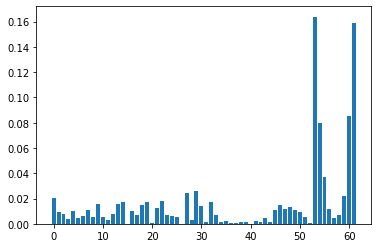

In [33]:
from matplotlib import pyplot
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Most important features
1. feature 61 - no employees
2. feature 60 - euribor3m
3. feature 54 - pdays
4. feature 53 - campaign

Feature selection is often a key DM step, since it is useful to discard irrelevant inputs, leading to simpler data-driven models that are easier to interpret and that tend to provide better predictive performances

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, roc_auc_score

#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.92      0.91      0.91     10967
         yes       0.33      0.36      0.34      1390

    accuracy                           0.84     12357
   macro avg       0.62      0.63      0.63     12357
weighted avg       0.85      0.84      0.85     12357



In [35]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y_test_float = lb.fit_transform(y_test)
y_preds_float = lb.fit_transform(y_preds)
#RMS error
mean_squared_error(y_test_float, y_preds_float, squared=False)

0.39397419615140683

The receiver operating characteristic (ROC) curve shows the performance of a two class classifer across the range of possible threshold (D) values, plotting one minus the specificity (x-axis) versus the sensitivity (y-axis) The overall accuracy is given by the area under the curve (AUC =  ROCdD), measuring the degree of discrimination that can be obtained from a given model. AUC is a popular classification metric that presents advantages of being independent of the class frequency or specific false  positive/negative costs. The ideal method should present an AUC of 1.0, while an AUC of 0.5 denotes a random classifier.

In [36]:
#ROC area
roc_auc_score(y_test_float, y_preds_float)

0.6326741178407689

In [37]:
#confusion matrix
confusion_matrix(y_test, y_preds)

array([[9940, 1027],
       [ 891,  499]], dtype=int64)

In [38]:
# accuracy score
#Decision tree
print(clf.__class__.__name__, accuracy_score(y_test, y_preds))
print(f'Classification Report for {clf.__class__.__name__}')
print(classification_report(y_test, y_preds))
print('*'*60)
print(f"the model is {accuracy_score(y_test, y_preds)*100:.2f}% accurate")

DecisionTreeClassifier 0.8447843327668528
Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

          no       0.92      0.91      0.91     10967
         yes       0.33      0.36      0.34      1390

    accuracy                           0.84     12357
   macro avg       0.62      0.63      0.63     12357
weighted avg       0.85      0.84      0.85     12357

************************************************************
the model is 84.48% accurate


### KNN

In [39]:
neigh_3.score(X_test, y_test)

0.8800679776644816

In [121]:
# using 10 fold cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(neigh_3, X_test, y_test, cv=10)
print(f"%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.90 accuracy with a standard deviation of 0.02


In [40]:
from sklearn.inspection import permutation_importance
results = permutation_importance(neigh_3, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00018
Feature: 1, Score: -0.00016
Feature: 2, Score: 0.00010
Feature: 3, Score: 0.00016
Feature: 4, Score: 0.00034
Feature: 5, Score: -0.00040
Feature: 6, Score: 0.00028
Feature: 7, Score: 0.00024
Feature: 8, Score: -0.00005
Feature: 9, Score: -0.00074
Feature: 10, Score: -0.00005
Feature: 11, Score: 0.00008
Feature: 12, Score: -0.00062
Feature: 13, Score: -0.00146
Feature: 14, Score: -0.00099
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.00028
Feature: 17, Score: 0.00006
Feature: 18, Score: 0.00024
Feature: 19, Score: 0.00008
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00013
Feature: 22, Score: -0.00062
Feature: 23, Score: -0.00011
Feature: 24, Score: 0.00013
Feature: 25, Score: 0.00013
Feature: 26, Score: 0.00000
Feature: 27, Score: -0.00037
Feature: 28, Score: -0.00021
Feature: 29, Score: -0.00006
Feature: 30, Score: -0.00005
Feature: 31, Score: -0.00021
Feature: 32, Score: 0.00023
Feature: 33, Score: -0.00076
Feature: 34, Score: -0.00076
Feature: 35,

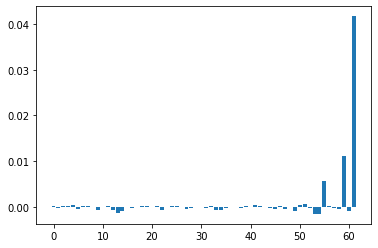

In [41]:
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [42]:
neigh_20.score(X_test, y_test)

0.8994092417253379

Feature: 0, Score: -0.00003
Feature: 1, Score: 0.00002
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.00002
Feature: 4, Score: 0.00002
Feature: 5, Score: 0.00019
Feature: 6, Score: -0.00006
Feature: 7, Score: 0.00002
Feature: 8, Score: -0.00010
Feature: 9, Score: -0.00023
Feature: 10, Score: -0.00010
Feature: 11, Score: 0.00002
Feature: 12, Score: 0.00011
Feature: 13, Score: -0.00023
Feature: 14, Score: -0.00021
Feature: 15, Score: 0.00002
Feature: 16, Score: 0.00005
Feature: 17, Score: -0.00005
Feature: 18, Score: 0.00006
Feature: 19, Score: -0.00028
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.00021
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00008
Feature: 24, Score: 0.00011
Feature: 25, Score: 0.00011
Feature: 26, Score: 0.00000
Feature: 27, Score: -0.00008
Feature: 28, Score: -0.00008
Feature: 29, Score: -0.00023
Feature: 30, Score: 0.00002
Feature: 31, Score: -0.00008
Feature: 32, Score: 0.00005
Feature: 33, Score: -0.00003
Feature: 34, Score: -0.00003
Feature: 35, 

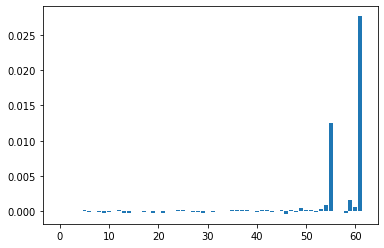

In [43]:
results = permutation_importance(neigh_20, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [44]:
neigh_30.score(X_test, y_test)

0.8994901675163874

Feature: 0, Score: 0.00010
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00000
Feature: 3, Score: 0.00002
Feature: 4, Score: -0.00008
Feature: 5, Score: 0.00008
Feature: 6, Score: -0.00003
Feature: 7, Score: -0.00002
Feature: 8, Score: 0.00024
Feature: 9, Score: 0.00013
Feature: 10, Score: -0.00002
Feature: 11, Score: 0.00000
Feature: 12, Score: -0.00005
Feature: 13, Score: -0.00032
Feature: 14, Score: -0.00005
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00013
Feature: 17, Score: -0.00002
Feature: 18, Score: -0.00002
Feature: 19, Score: 0.00026
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.00000
Feature: 22, Score: -0.00006
Feature: 23, Score: 0.00000
Feature: 24, Score: -0.00005
Feature: 25, Score: -0.00005
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00063
Feature: 28, Score: -0.00005
Feature: 29, Score: 0.00063
Feature: 30, Score: 0.00005
Feature: 31, Score: -0.00005
Feature: 32, Score: -0.00003
Feature: 33, Score: -0.00037
Feature: 34, Score: -0.00037
Feature: 3

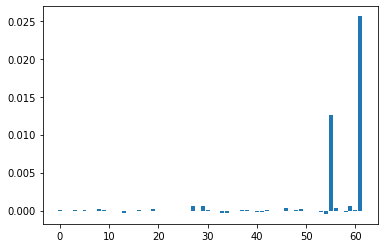

In [45]:
results = permutation_importance(neigh_30, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [46]:
neigh_40.score(X_test, y_test)

0.8996520190984867

Feature: 0, Score: -0.00013
Feature: 1, Score: -0.00011
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.00008
Feature: 5, Score: 0.00002
Feature: 6, Score: 0.00000
Feature: 7, Score: -0.00003
Feature: 8, Score: 0.00008
Feature: 9, Score: 0.00005
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00002
Feature: 13, Score: 0.00005
Feature: 14, Score: 0.00002
Feature: 15, Score: 0.00000
Feature: 16, Score: -0.00005
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00003
Feature: 19, Score: 0.00011
Feature: 20, Score: 0.00000
Feature: 21, Score: -0.00002
Feature: 22, Score: -0.00045
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: -0.00032
Feature: 28, Score: 0.00002
Feature: 29, Score: -0.00031
Feature: 30, Score: -0.00002
Feature: 31, Score: 0.00002
Feature: 32, Score: -0.00008
Feature: 33, Score: 0.00008
Feature: 34, Score: 0.00008
Feature: 35, Score

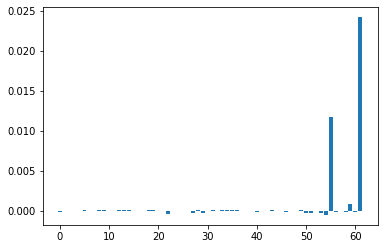

In [47]:
results = permutation_importance(neigh_40, X_test, y_test, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [48]:
KNN_3_preds_float = lb.fit_transform(KNN_3_preds)
#RMS error
mean_squared_error(y_test_float, KNN_3_preds_float, squared=False)

0.3463120303072337

In [49]:
#ROC area
roc_auc_score(y_test_float, KNN_3_preds_float)

0.6239669302216657

In [50]:
#classification report
print(classification_report(y_test, KNN_3_preds))


              precision    recall  f1-score   support

          no       0.91      0.95      0.93     10967
         yes       0.45      0.29      0.36      1390

    accuracy                           0.88     12357
   macro avg       0.68      0.62      0.64     12357
weighted avg       0.86      0.88      0.87     12357



In [51]:
#classification report
print(classification_report(y_test, KNN_20_preds))
KNN_20_preds_float = lb.fit_transform(KNN_20_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, KNN_20_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, KNN_20_preds_float)}")

              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10967
         yes       0.65      0.22      0.33      1390

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

RMS error: 0.31716046139874077
ROC area: 0.6047076481242288


In [52]:
#classification report
print(classification_report(y_test, KNN_30_preds))
KNN_30_preds_float = lb.fit_transform(KNN_30_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, KNN_30_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, KNN_30_preds_float)}")

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10967
         yes       0.67      0.21      0.32      1390

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357

RMS error: 0.3170328571041376
ROC area: 0.5984708212275807


In [53]:
#classification report
print(classification_report(y_test, KNN_40_preds))
KNN_40_preds_float = lb.fit_transform(KNN_40_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, KNN_40_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, KNN_40_preds_float)}")

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10967
         yes       0.67      0.21      0.32      1390

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357

RMS error: 0.31677749431030183
ROC area: 0.5988761247772093


In [54]:
#confusion matrix
confusion_matrix(y_test, KNN_3_preds)

array([[10467,   500],
       [  982,   408]], dtype=int64)

In [55]:
#confusion matrix
confusion_matrix(y_test, KNN_20_preds)

array([[10802,   165],
       [ 1078,   312]], dtype=int64)

In [56]:
#confusion matrix
confusion_matrix(y_test, KNN_30_preds)

array([[10823,   144],
       [ 1098,   292]], dtype=int64)

In [57]:
#confusion matrix
confusion_matrix(y_test, KNN_40_preds)

array([[10824,   143],
       [ 1097,   293]], dtype=int64)

In [58]:
# accuracy score
#KNN with 3 neighbors
print(neigh_3.__class__.__name__, accuracy_score(y_test, KNN_3_preds))
print(f'Classification Report for {neigh_3.__class__.__name__}')
print(classification_report(y_test, KNN_3_preds))
print('*'*60)
print(f"the KNN model is {accuracy_score(y_test, KNN_3_preds)*100:.2f}% accurate")

KNeighborsClassifier 0.8800679776644816
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

          no       0.91      0.95      0.93     10967
         yes       0.45      0.29      0.36      1390

    accuracy                           0.88     12357
   macro avg       0.68      0.62      0.64     12357
weighted avg       0.86      0.88      0.87     12357

************************************************************
the KNN model is 88.01% accurate


In [59]:
# accuracy score
#KNN with 20 neighbors
print(neigh_20.__class__.__name__, accuracy_score(y_test, KNN_20_preds))
print(f'Classification Report for {neigh_20.__class__.__name__}')
print(classification_report(y_test, KNN_20_preds))
print('*'*60)
print(f"the KNN model is {accuracy_score(y_test, KNN_20_preds)*100:.2f}% accurate")

KNeighborsClassifier 0.8994092417253379
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     10967
         yes       0.65      0.22      0.33      1390

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

************************************************************
the KNN model is 89.94% accurate


In [60]:
# accuracy score
#KNN with 30 neighbors
print(neigh_30.__class__.__name__, accuracy_score(y_test, KNN_30_preds))
print(f'Classification Report for {neigh_30.__class__.__name__}')
print(classification_report(y_test, KNN_30_preds))
print('*'*60)
print(f"the KNN model is {accuracy_score(y_test, KNN_30_preds)*100:.2f}% accurate")

KNeighborsClassifier 0.8994901675163874
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10967
         yes       0.67      0.21      0.32      1390

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357

************************************************************
the KNN model is 89.95% accurate


In [61]:
# accuracy score
#KNN with 40 neighbors
print(neigh_40.__class__.__name__, accuracy_score(y_test, KNN_40_preds))
print(f'Classification Report for {neigh_40.__class__.__name__}')
print(classification_report(y_test, KNN_40_preds))
print('*'*60)
print(f"the KNN model is {accuracy_score(y_test, KNN_40_preds)*100:.2f}% accurate")

KNeighborsClassifier 0.8996520190984867
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10967
         yes       0.67      0.21      0.32      1390

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357

************************************************************
the KNN model is 89.97% accurate


### Neural network

In [62]:
 mlp.score(X_test, y_test)

0.8901837015456826

In [63]:
MLP_preds_float = lb.fit_transform(KNN_40_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, MLP_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, MLP_preds_float)}")

RMS error: 0.31677749431030183
ROC area: 0.5988761247772093


In [64]:
#classification report
print(classification_report(y_test, MLP_preds))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94     10967
         yes       0.70      0.04      0.08      1390

    accuracy                           0.89     12357
   macro avg       0.80      0.52      0.51     12357
weighted avg       0.87      0.89      0.84     12357



In [65]:
#confusion matrix
confusion_matrix(y_test, MLP_preds)

array([[10943,    24],
       [ 1333,    57]], dtype=int64)

In [66]:
# accuracy score
#Neural networks
print(mlp.__class__.__name__, accuracy_score(y_test, MLP_preds))
print(f'Classification Report for {mlp.__class__.__name__}')
print(classification_report(y_test, MLP_preds))
print('*'*60)
print(f"the Neural net model is {accuracy_score(y_test, MLP_preds)*100:.2f}% accurate")

MLPClassifier 0.8901837015456826
Classification Report for MLPClassifier
              precision    recall  f1-score   support

          no       0.89      1.00      0.94     10967
         yes       0.70      0.04      0.08      1390

    accuracy                           0.89     12357
   macro avg       0.80      0.52      0.51     12357
weighted avg       0.87      0.89      0.84     12357

************************************************************
the Neural net model is 89.02% accurate


### SVM

In [67]:
svm_clf.score(X_test, y_test)

0.8993283159342883

In [68]:
SVC_preds_float = lb.fit_transform(SVC_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, SVC_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, SVC_preds_float)}")

RMS error: 0.31728801437449816
ROC area: 0.6005784849643765


In [69]:
#classification report
print(classification_report(y_test, SVC_preds))

              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10967
         yes       0.66      0.22      0.32      1390

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357



In [70]:
#confusion matrix
confusion_matrix(y_test, SVC_preds)

array([[10814,   153],
       [ 1091,   299]], dtype=int64)

In [71]:
# accuracy score
#Neural networks
print(svm_clf.__class__.__name__, accuracy_score(y_test, SVC_preds))
print(f'Classification Report for {svm_clf.__class__.__name__}')
print(classification_report(y_test, SVC_preds))
print('*'*60)
print(f"the Neural net model is {accuracy_score(y_test, SVC_preds)*100:.2f}% accurate")

SVC 0.8993283159342883
Classification Report for SVC
              precision    recall  f1-score   support

          no       0.91      0.99      0.95     10967
         yes       0.66      0.22      0.32      1390

    accuracy                           0.90     12357
   macro avg       0.78      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

************************************************************
the Neural net model is 89.93% accurate


## 5. Work with the smaller dataset and classify the data

In [72]:
# Create X(data/feature variables)
X_small = df_small.drop("y", axis=1)
X_small.describe()

,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### convert categorical features into numeric features

In [73]:
categorical_features = ['job','marital','education', 'default', 'housing', 'loan', 'contact',
        'month', 'day_of_week', 'poutcome'
        ]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(X_small)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,60,61
0,0,1,0,0,0,0,0,0,0,0,...,0,30,2,999,0,-1.8,92.893,-46.2,1.313,5099.1
1,0,0,0,0,0,0,0,1,0,0,...,0,39,4,999,0,1.1,93.994,-36.4,4.855,5191
2,0,0,0,0,0,0,0,1,0,0,...,0,25,1,999,0,1.4,94.465,-41.8,4.962,5228.1
3,0,0,0,0,0,0,0,1,0,0,...,0,38,3,999,0,1.4,94.465,-41.8,4.959,5228.1
4,1,0,0,0,0,0,0,0,0,0,...,0,47,1,999,0,-0.1,93.2,-42,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,1,0,0,0,0,0,0,0,0,0,...,0,30,1,999,0,1.4,93.918,-42.7,4.958,5228.1
4115,1,0,0,0,0,0,0,0,0,0,...,0,39,1,999,0,1.4,93.918,-42.7,4.959,5228.1
4116,0,0,0,0,0,0,0,0,1,0,...,0,27,2,999,1,-1.8,92.893,-46.2,1.354,5099.1
4117,1,0,0,0,0,0,0,0,0,0,...,0,58,1,999,0,1.4,93.444,-36.1,4.966,5228.1


In [74]:
# Create Y(labels)
y = df_small["y"]
#global_y=y
y.describe()

count     4119
unique       2
top         no
freq      3668
Name: y, dtype: object

### Split the training and test data

In [75]:
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3, shuffle=True)
print("X_Training data\n", X_train)
print("X_Test data\n", X_test)
print("y_Training data\n", y_train)
print("y_Test data\n",  y_test)

X_Training data
 [[1.0 0.0 0.0 ... -36.1 4.965 5228.1]
 [0.0 1.0 0.0 ... -41.8 4.96 5228.1]
 [0.0 0.0 0.0 ... -31.4 0.883 5076.2]
 ...
 [0.0 1.0 0.0 ... -41.8 4.947 5228.1]
 [0.0 1.0 0.0 ... -42.7 4.963 5228.1]
 [0.0 0.0 0.0 ... -42.7 4.963 5228.1]]
X_Test data
 [[0.0 0.0 0.0 ... -47.1 1.405 5099.1]
 [0.0 0.0 0.0 ... -42.0 4.0760000000000005 5195.8]
 [0.0 1.0 0.0 ... -41.8 4.961 5228.1]
 ...
 [1.0 0.0 0.0 ... -36.4 4.857 5191.0]
 [0.0 1.0 0.0 ... -42.7 4.96 5228.1]
 [0.0 0.0 0.0 ... -42.7 4.961 5228.1]]
y_Training data
 1082     no
3860     no
775      no
4107     no
3669    yes
       ... 
1580     no
321      no
1590     no
1361     no
3085     no
Name: y, Length: 2883, dtype: object
y_Test data
 3922     no
3805     no
1441     no
1681    yes
911      no
       ... 
3431     no
2022     no
1048     no
1401     no
382      no
Name: y, Length: 1236, dtype: object


### Fitting the algorithms

#### Decision tree

In [76]:
start = time.time()
clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
y_preds = clf.predict(X_test)
y_preds

Training time: 0.030002117156982422s


array(['no', 'yes', 'no', ..., 'no', 'no', 'no'], dtype=object)

#### Feature importances

In [77]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02413
Feature: 1, Score: 0.00714
Feature: 2, Score: 0.00651
Feature: 3, Score: 0.00201
Feature: 4, Score: 0.01415
Feature: 5, Score: 0.00709
Feature: 6, Score: 0.00254
Feature: 7, Score: 0.00506
Feature: 8, Score: 0.00128
Feature: 9, Score: 0.01206
Feature: 10, Score: 0.01291
Feature: 11, Score: 0.00093
Feature: 12, Score: 0.01166
Feature: 13, Score: 0.01515
Feature: 14, Score: 0.00527
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00519
Feature: 17, Score: 0.00569
Feature: 18, Score: 0.01637
Feature: 19, Score: 0.01218
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.01617
Feature: 22, Score: 0.01212
Feature: 23, Score: 0.00850
Feature: 24, Score: 0.00666
Feature: 25, Score: 0.01288
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.01738
Feature: 28, Score: 0.00506
Feature: 29, Score: 0.01777
Feature: 30, Score: 0.01221
Feature: 31, Score: 0.00171
Feature: 32, Score: 0.01241
Feature: 33, Score: 0.00257
Feature: 34, Score: 0.01337
Feature: 35, Score: 0.00000
Fe

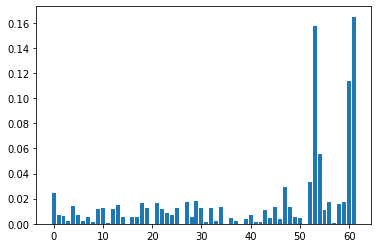

In [78]:
#Show the most important attributes
from matplotlib import pyplot
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Neural network

In [79]:
start = time.time()
mlp = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
mlp.predict_proba(X_test)
MLP_preds = mlp.predict(X_test)
MLP_preds

Training time: 1.2639334201812744s


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype='<U3')

#### SVM

In [80]:
svm_clf = svm.SVC()
start = time.time()
svm_clf.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
SVC_preds = svm_clf.predict(X_test)
SVC_preds

Training time: 0.20588135719299316s


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

#### KNN

In [81]:
start3 = time.time()
neigh_3.fit(X_train, y_train)
stop3 = time.time()
start20 = time.time()
neigh_20.fit(X_train, y_train)
stop20 = time.time()
start30 = time.time()
neigh_30.fit(X_train, y_train)
stop30 = time.time()
start40 = time.time()
neigh_40.fit(X_train, y_train)
stop40 = time.time()

In [82]:
print("KNN with 3 neighbours",neigh_3.predict(X_test))
print(f"Training time: {stop3 - start3}s")
KNN_3_preds = neigh_3.predict(X_test)

KNN with 3 neighbours ['no' 'no' 'no' ... 'no' 'no' 'yes']
Training time: 0.060944318771362305s


In [83]:
print("KNN with 20 neighbours",neigh_20.predict(X_test))
print(f"Training time: {stop20 - start20}s")
KNN_20_preds = neigh_20.predict(X_test)

KNN with 20 neighbours ['no' 'no' 'no' ... 'no' 'no' 'no']
Training time: 0.0779571533203125s


In [84]:
print("KNN with 30 neighbours",neigh_30.predict(X_test))
print(f"Training time: {stop30 - start30}s")
KNN_30_preds = neigh_30.predict(X_test)

KNN with 30 neighbours ['no' 'no' 'no' ... 'no' 'no' 'no']
Training time: 0.08295154571533203s


In [85]:
print("KNN with 40 neighbours",neigh_40.predict(X_test))
print(f"Training time: {stop40 - start40}s")
KNN_40_preds = neigh_40.predict(X_test)

KNN with 40 neighbours ['no' 'no' 'no' ... 'no' 'no' 'no']
Training time: 0.07195878028869629s


## Evaluating the models' perfomance

#### Decision tree

In [86]:
# evaluate perfomance on test data
clf.score(X_test, y_test)


0.8406148867313916

In [87]:
y_test_float = lb.fit_transform(y_test)
y_preds_float = lb.fit_transform(y_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, y_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, y_preds_float)}")

RMS error: 0.39923065171478056
ROC area: 0.609587518066931


In [88]:
#classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

          no       0.92      0.90      0.91      1115
         yes       0.25      0.32      0.28       121

    accuracy                           0.84      1236
   macro avg       0.59      0.61      0.60      1236
weighted avg       0.86      0.84      0.85      1236



In [89]:
#confusion matrix
confusion_matrix(y_test, y_preds)

array([[1000,  115],
       [  82,   39]], dtype=int64)

In [90]:
# accuracy score
#Decision tree
print(clf.__class__.__name__, accuracy_score(y_test, y_preds))
print(f'Classification Report for {clf.__class__.__name__}')
print(classification_report(y_test, y_preds))
print('*'*60)
print(f"the model is {accuracy_score(y_test, y_preds)*100:.2f}% accurate")

DecisionTreeClassifier 0.8406148867313916
Classification Report for DecisionTreeClassifier
              precision    recall  f1-score   support

          no       0.92      0.90      0.91      1115
         yes       0.25      0.32      0.28       121

    accuracy                           0.84      1236
   macro avg       0.59      0.61      0.60      1236
weighted avg       0.86      0.84      0.85      1236

************************************************************
the model is 84.06% accurate


### KNN

In [91]:
neigh_3.score(X_test, y_test)

0.8948220064724919

In [92]:
neigh_20.score(X_test, y_test)

0.9110032362459547

In [93]:
neigh_30.score(X_test, y_test)

0.9061488673139159

In [94]:
neigh_40.score(X_test, y_test)

0.9061488673139159

In [95]:
KNN_3_preds_float = lb.fit_transform(KNN_3_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, KNN_3_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, KNN_3_preds_float)}")

RMS error: 0.3243115685995615
ROC area: 0.6212133565578326


In [96]:
#classification report
print(classification_report(y_test, KNN_3_preds))

              precision    recall  f1-score   support

          no       0.92      0.96      0.94      1115
         yes       0.44      0.28      0.34       121

    accuracy                           0.89      1236
   macro avg       0.68      0.62      0.64      1236
weighted avg       0.88      0.89      0.88      1236



In [97]:
KNN_20_preds_float = lb.fit_transform(KNN_20_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, KNN_20_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, KNN_20_preds_float)}")

RMS error: 0.2983232537936748
ROC area: 0.5896601563947671


In [98]:
#classification report
print(classification_report(y_test, KNN_20_preds))

              precision    recall  f1-score   support

          no       0.92      0.99      0.95      1115
         yes       0.66      0.19      0.29       121

    accuracy                           0.91      1236
   macro avg       0.79      0.59      0.62      1236
weighted avg       0.89      0.91      0.89      1236



In [99]:
KNN_30_preds_float = lb.fit_transform(KNN_30_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, KNN_30_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, KNN_30_preds_float)}")

RMS error: 0.3063513223181583
ROC area: 0.594337175258496


In [100]:
#classification report
print(classification_report(y_test, KNN_30_preds))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1115
         yes       0.56      0.21      0.30       121

    accuracy                           0.91      1236
   macro avg       0.74      0.59      0.63      1236
weighted avg       0.88      0.91      0.89      1236



In [101]:
KNN_40_preds_float = lb.fit_transform(KNN_40_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, KNN_40_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, KNN_40_preds_float)}")

RMS error: 0.3063513223181583
ROC area: 0.5980209761701811


In [102]:
#classification report
print(classification_report(y_test, KNN_40_preds))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1115
         yes       0.55      0.21      0.31       121

    accuracy                           0.91      1236
   macro avg       0.74      0.60      0.63      1236
weighted avg       0.88      0.91      0.89      1236



In [103]:
#confusion matrix
confusion_matrix(y_test, KNN_3_preds)

array([[1072,   43],
       [  87,   34]], dtype=int64)

In [104]:
#confusion matrix
confusion_matrix(y_test, KNN_20_preds)

array([[1103,   12],
       [  98,   23]], dtype=int64)

In [105]:
#confusion matrix
confusion_matrix(y_test, KNN_30_preds)

array([[1095,   20],
       [  96,   25]], dtype=int64)

In [106]:
#confusion matrix
confusion_matrix(y_test, KNN_40_preds)

array([[1094,   21],
       [  95,   26]], dtype=int64)

In [107]:
# accuracy score
#KNN with 3 neighbors
print(neigh_3.__class__.__name__, accuracy_score(y_test, KNN_3_preds))
print(f'Classification Report for {neigh_3.__class__.__name__}')
print(classification_report(y_test, KNN_3_preds))
print('*'*60)
print(f"the KNN model is {accuracy_score(y_test, KNN_3_preds)*100:.2f}% accurate")

KNeighborsClassifier 0.8948220064724919
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

          no       0.92      0.96      0.94      1115
         yes       0.44      0.28      0.34       121

    accuracy                           0.89      1236
   macro avg       0.68      0.62      0.64      1236
weighted avg       0.88      0.89      0.88      1236

************************************************************
the KNN model is 89.48% accurate


In [108]:
# accuracy score
#KNN with 20 neighbors
print(neigh_20.__class__.__name__, accuracy_score(y_test, KNN_20_preds))
print(f'Classification Report for {neigh_20.__class__.__name__}')
print(classification_report(y_test, KNN_20_preds))
print('*'*60)
print(f"the KNN model is {accuracy_score(y_test, KNN_20_preds)*100:.2f}% accurate")

KNeighborsClassifier 0.9110032362459547
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

          no       0.92      0.99      0.95      1115
         yes       0.66      0.19      0.29       121

    accuracy                           0.91      1236
   macro avg       0.79      0.59      0.62      1236
weighted avg       0.89      0.91      0.89      1236

************************************************************
the KNN model is 91.10% accurate


In [109]:
# accuracy score
#KNN with 30 neighbors
print(neigh_30.__class__.__name__, accuracy_score(y_test, KNN_30_preds))
print(f'Classification Report for {neigh_30.__class__.__name__}')
print(classification_report(y_test, KNN_30_preds))
print('*'*60)
print(f"the KNN model is {accuracy_score(y_test, KNN_30_preds)*100:.2f}% accurate")

KNeighborsClassifier 0.9061488673139159
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1115
         yes       0.56      0.21      0.30       121

    accuracy                           0.91      1236
   macro avg       0.74      0.59      0.63      1236
weighted avg       0.88      0.91      0.89      1236

************************************************************
the KNN model is 90.61% accurate


In [110]:
# accuracy score
#KNN with 40 neighbors
print(neigh_40.__class__.__name__, accuracy_score(y_test, KNN_40_preds))
print(f'Classification Report for {neigh_40.__class__.__name__}')
print(classification_report(y_test, KNN_40_preds))
print('*'*60)
print(f"the KNN model is {accuracy_score(y_test, KNN_40_preds)*100:.2f}% accurate")

KNeighborsClassifier 0.9061488673139159
Classification Report for KNeighborsClassifier
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1115
         yes       0.55      0.21      0.31       121

    accuracy                           0.91      1236
   macro avg       0.74      0.60      0.63      1236
weighted avg       0.88      0.91      0.89      1236

************************************************************
the KNN model is 90.61% accurate


### Neural network

In [111]:
mlp.score(X_test, y_test)

0.9110032362459547

In [112]:
mlp_preds_float = lb.fit_transform(MLP_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, mlp_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, mlp_preds_float)}")

RMS error: 0.2983232537936748
ROC area: 0.5933439573064523


In [113]:
#classification report
print(classification_report(y_test, MLP_preds))

              precision    recall  f1-score   support

          no       0.92      0.99      0.95      1115
         yes       0.65      0.20      0.30       121

    accuracy                           0.91      1236
   macro avg       0.78      0.59      0.63      1236
weighted avg       0.89      0.91      0.89      1236



In [114]:
#confusion matrix
confusion_matrix(y_test, MLP_preds)

array([[1102,   13],
       [  97,   24]], dtype=int64)

In [115]:
# accuracy score
#Neural networks
print(mlp.__class__.__name__, accuracy_score(y_test, MLP_preds))
print(f'Classification Report for {mlp.__class__.__name__}')
print(classification_report(y_test, MLP_preds))
print('*'*60)
print(f"the Neural net model is {accuracy_score(y_test, MLP_preds)*100:.2f}% accurate")

MLPClassifier 0.9110032362459547
Classification Report for MLPClassifier
              precision    recall  f1-score   support

          no       0.92      0.99      0.95      1115
         yes       0.65      0.20      0.30       121

    accuracy                           0.91      1236
   macro avg       0.78      0.59      0.63      1236
weighted avg       0.89      0.91      0.89      1236

************************************************************
the Neural net model is 91.10% accurate


## SVM

In [116]:
svm_clf.score(X_test, y_test)

0.9061488673139159

In [117]:
SVC_preds_float = lb.fit_transform(SVC_preds)
#RMS error
print(f"RMS error: {mean_squared_error(y_test_float, SVC_preds_float, squared=False)}")
#ROC area
print(f"ROC area: {roc_auc_score(y_test_float, SVC_preds_float)}")

RMS error: 0.3063513223181583
ROC area: 0.5980209761701811


In [118]:
#classification report
print(classification_report(y_test, SVC_preds))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1115
         yes       0.55      0.21      0.31       121

    accuracy                           0.91      1236
   macro avg       0.74      0.60      0.63      1236
weighted avg       0.88      0.91      0.89      1236



In [119]:
#confusion matrix
confusion_matrix(y_test, SVC_preds)

array([[1094,   21],
       [  95,   26]], dtype=int64)

In [120]:
# accuracy score
#Neural networks
print(svm_clf.__class__.__name__, accuracy_score(y_test, SVC_preds))
print(f'Classification Report for {svm_clf.__class__.__name__}')
print(classification_report(y_test, SVC_preds))
print('*'*60)
print(f"the Neural net model is {accuracy_score(y_test, SVC_preds)*100:.2f}% accurate")

SVC 0.9061488673139159
Classification Report for SVC
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      1115
         yes       0.55      0.21      0.31       121

    accuracy                           0.91      1236
   macro avg       0.74      0.60      0.63      1236
weighted avg       0.88      0.91      0.89      1236

************************************************************
the Neural net model is 90.61% accurate


## Summary

NN is the advised modeling technique, producing the best TPR and FPR trade-off within most of the sensitive range. In effect, NN outperforms the SVM model for the sample size ranges of [0.06;0.24] and [0.27;0.99], presenting an average difference of 2 people within the range [0.27:0.9].

Probability of success decreases by 10 people when the Euribor rate is higher than 0.73. A study attributed this to the 2008 wallstreet crash. Prior to 2008 a weak positive relation could be observed between offered rate for deposits and savings rate, after 2008, with the financial crisis, that relation reversed, turning clients more prone to savings while the Euribor constantly decreased.

The financial crisis changed the way the Euribor affects savings rate, turning clients more likely to perform savings while Euribor decreased. Moreover, inbound calls and an increase in other highly relevant attributes (i.e., difference in best possible rate, agent experience or duration of previous calls), enhance the probability for a successful deposit sell.